In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = "ENB2012_data_Energy_efficiency.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [4]:
df=df.drop(columns=['Unnamed: 10', 'Unnamed: 11','Y2'])

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84


In [6]:
df['X1'].value_counts(dropna=False)

NaN     528
0.82     64
0.69     64
0.90     64
0.79     64
0.71     64
0.66     64
0.98     64
0.64     64
0.86     64
0.76     64
0.74     64
0.62     64
Name: X1, dtype: int64

In [7]:

df.dropna(inplace=True)
df['X3'].value_counts()

318.5    192
294.0    192
343.0    128
367.5     64
245.0     64
269.5     64
416.5     64
Name: X3, dtype: int64

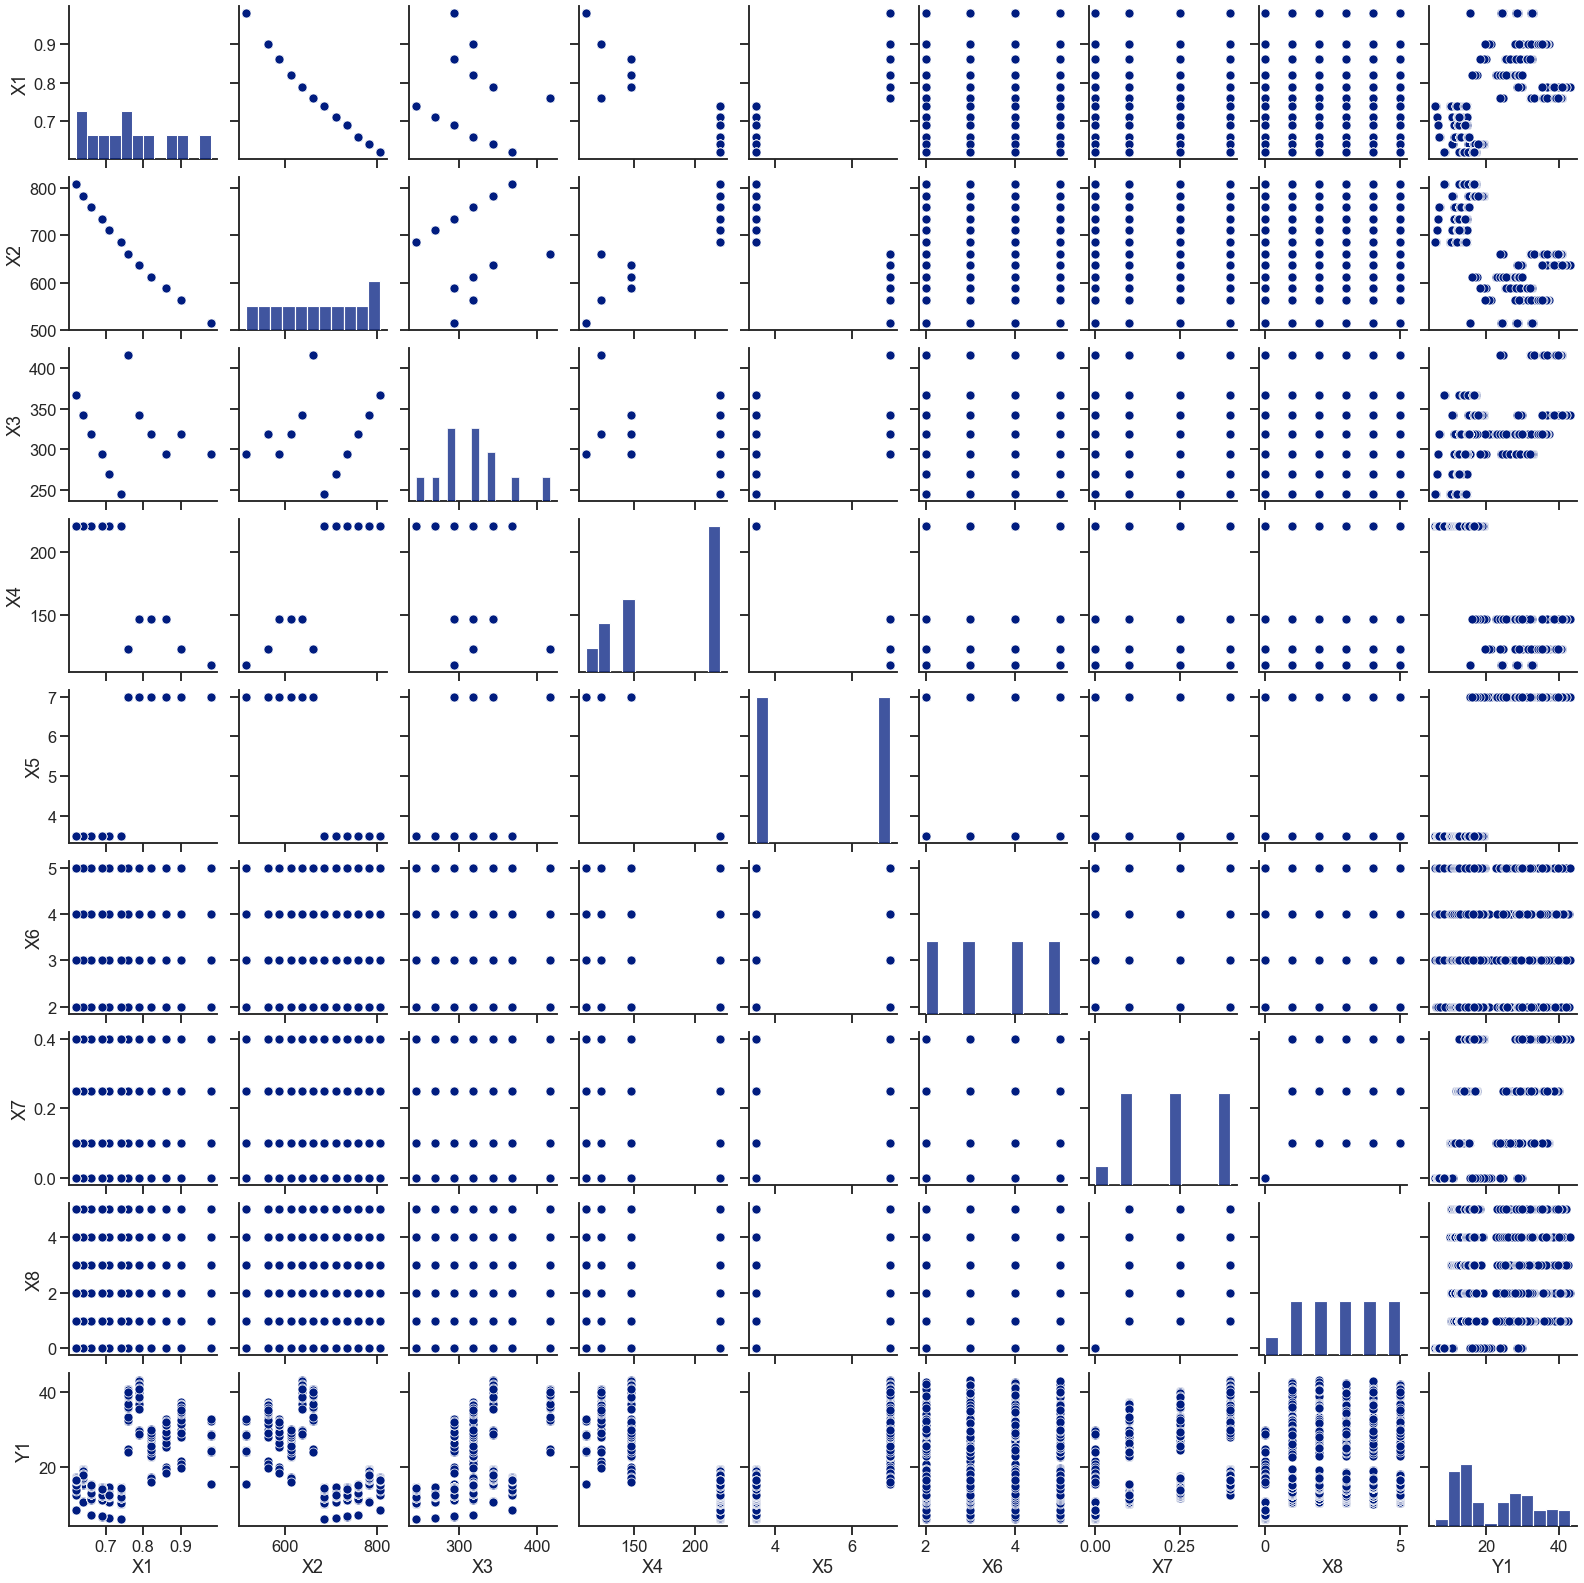

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(df)
plt.show()

In [9]:
y_col = 'Y1'

#Split x and y
feature_cols = [x for x in df.columns if x!= y_col]
x_data = df[feature_cols]
y_data = df[y_col]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
#Error Storage
error_df = []

LR = LR.fit(x_train_scaled,y_train)
y_train_pred = LR.predict(x_train_scaled)
y_test_pred = LR.predict(x_test_scaled)

error_df.append(pd.Series({"train":mean_squared_error(y_train, y_train_pred),
                            "test": mean_squared_error(y_test_pred,y_test)},
                             name='Error'))

error_df

[train    8.154069
 test     9.399764
 Name: Error, dtype: float64]

MSE: 9.399764451260113


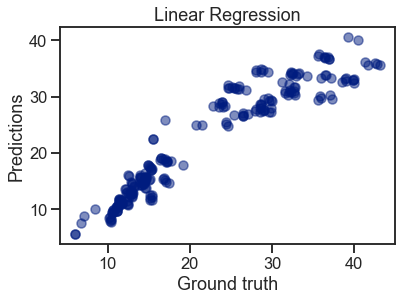

In [14]:

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(y_test, y_test_pred, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Linear Regression')

print("MSE: {}".format(mean_squared_error(y_test,y_test_pred)))

[Text(0, 0.5, 'Coefficient'),
 Text(0.5, 0, 'Feature'),
 Text(0.5, 1.0, 'Linear Regression Coefficients')]

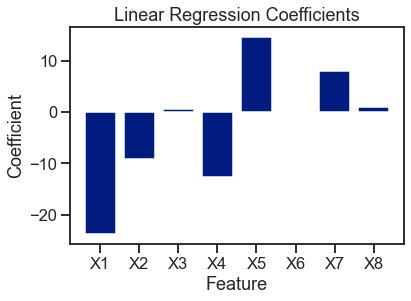

In [26]:

ax = plt.axes()
ax.bar(df.columns[:-1],LR.coef_)
ax.set(xlabel = 'Feature',
      ylabel = 'Coefficient',
      title = 'Linear Regression Coefficients')

MSE: 0.29128119404451946


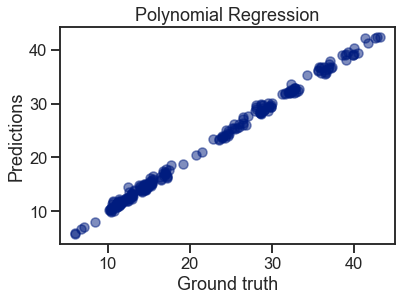

In [15]:
from sklearn.preprocessing import PolynomialFeatures
degree = 4
pf = PolynomialFeatures(degree)
lr_poly = LinearRegression()

x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

lr_poly = lr_poly.fit(x_train_poly, y_train)
y_test_poly_pred = lr_poly.predict(x_test_poly)

ax = plt.axes()
ax.scatter(y_test, y_test_poly_pred, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Polynomial Regression')
print("MSE: {}".format(mean_squared_error(y_test,y_test_poly_pred)))


MSE: 0.4139124749147645


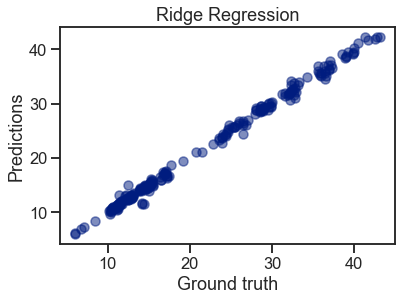

In [16]:
import warnings
warnings.filterwarnings('ignore', module = 'sklearn')


from sklearn.linear_model import Ridge, Lasso
degree = 12
pf = PolynomialFeatures(degree)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)


scaler = MinMaxScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)
#Ridge Regression
rr = Ridge(alpha=0.001)
rr= rr.fit(x_train_poly_scaled, y_train)
y_pred_rr = rr.predict(x_test_poly_scaled)

ax = plt.axes()
ax.scatter(y_test, y_pred_rr, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Ridge Regression')
print("MSE: {}".format(mean_squared_error(y_test,y_pred_rr)))

MSE: 0.4064568250932788


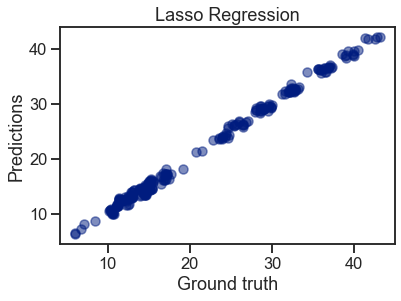

In [17]:
#Lasso

lassor = Lasso(alpha=0.0001, max_iter = 1e3)
lassor= lassor.fit(x_train_poly_scaled, y_train)
y_pred_lassor = lassor.predict(x_test_poly_scaled)

ax = plt.axes()
ax.scatter(y_test, y_pred_lassor, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Lasso Regression')
print("MSE: {}".format(mean_squared_error(y_test,y_pred_lassor)))

alpha = 0.005
MSE: 0.781216066659291


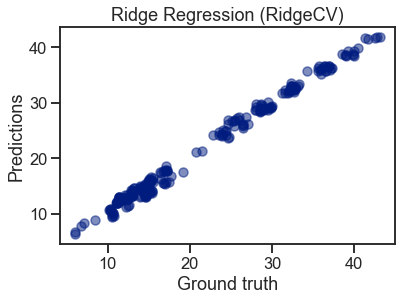

In [18]:
from sklearn.linear_model import RidgeCV
#Reduce polynomial features in order to get this done in an acceptable time
degree = 5
pf = PolynomialFeatures(degree)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

scaler = MinMaxScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

# RidgeCV
alphas = [0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]

ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(x_train_poly_scaled, y_train)
y_pred_ridgeCV = ridgeCV.predict(x_test_poly_scaled)

ax = plt.axes()
ax.scatter(y_test, y_pred_ridgeCV, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Ridge Regression (RidgeCV)')
print("alpha = {}".format(ridgeCV.alpha_))
print("MSE: {}".format(mean_squared_error(y_test,y_pred_ridgeCV)))

alpha = 0.0001
MSE: 3.3451686137251277


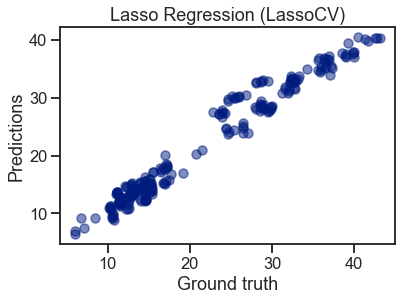

In [19]:
from sklearn.linear_model import LassoCV

# LassoCV
alphas2 = [0.0001,0.005,0.05,0.1,0.3,1,3,5,10,15,30,80,100,140]

lassoCV = LassoCV(alphas=alphas2, max_iter = 1e3, cv=4).fit(x_train_poly_scaled, y_train)
y_pred_lassoCV = lassoCV.predict(x_test_poly_scaled)

ax = plt.axes()
ax.scatter(y_test, y_pred_lassoCV, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Lasso Regression (LassoCV)')
print("alpha = {}".format(lassoCV.alpha_))
print("MSE: {}".format(mean_squared_error(y_test,y_pred_lassoCV)))

alpha = 0.005
l1_ratio = 0.9
MSE: 5.032394803368104


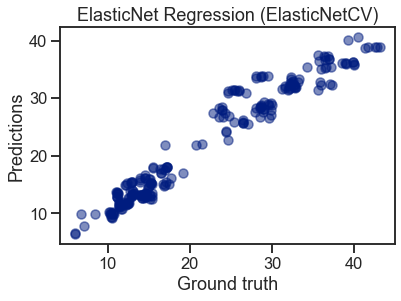

In [20]:
from sklearn.linear_model import ElasticNetCV

# ElasticNetCV
alphas3 = [0.005,0.05,0.1,0.3,1,10,30,80]
l1_ratios = np.linspace(0.1,0.9,9)

elasticNetCV = ElasticNetCV(alphas=alphas3, l1_ratio = l1_ratios, max_iter = 1e3).fit(x_train_poly_scaled, y_train)
y_pred_elasticNetCV = elasticNetCV.predict(x_test_poly_scaled)

ax = plt.axes()
ax.scatter(y_test, y_pred_elasticNetCV, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'ElasticNet Regression (ElasticNetCV)')
print("alpha = {}".format(elasticNetCV.alpha_))
print("l1_ratio = {}".format(elasticNetCV.l1_ratio_))
print("MSE: {}".format(mean_squared_error(y_test,y_pred_elasticNetCV)))

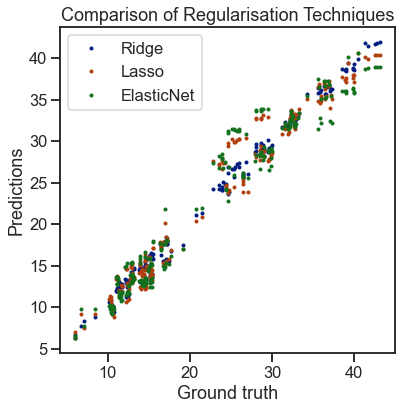

In [21]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()
labels = ['Ridge', 'Lasso', 'ElasticNet']
models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(x_test_poly_scaled), marker = 'o', ls='', ms=3.0, label = lab)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Comparison of Regularisation Techniques')
ax.legend()